In [1]:
import spacy
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
import random

### Task 1

In [2]:
df = pd.read_csv("twitter2.csv")
clean_text = df["clean_text"]
category = df["category"]

In [3]:
nlp = spacy.load("en_core_web_sm")

In [4]:
docs = list(nlp.pipe(df["clean_text"]))

In [5]:
# for doc in docs:
#     print([token.text for token in doc])

In [6]:
def preprocess_text(doc):
    processed_tokens = []
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.is_space:
            processed_tokens.append(token.lemma_)
    return " ".join(processed_tokens)

### Task 2


In [7]:
def plot_confusion_matrix(conf_matrix, title="Confusion Matrix", cmap="Yellows"):
    class_labels = ['Negative', 'Neutral', 'Positive']
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap,
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.show()

In [8]:
df["preprocessed_text_spacy"] = [preprocess_text(doc) for doc in docs]

In [9]:
text = df["preprocessed_text_spacy"]
sentiments = df["category"]

In [10]:
text_train, text_test, sentiment_train, sentiment_test = train_test_split(text, sentiments, test_size=0.2, random_state=42)

In [49]:
tfidf_vectorizer = TfidfVectorizer(min_df=3, max_df=0.9)
text_train_tfidf = tfidf_vectorizer.fit_transform(text_train)
text_test_tfidf = tfidf_vectorizer.transform(text_test)

In [50]:
mnb = MultinomialNB()
mnb.fit(text_train_tfidf, sentiment_train)
sentiment_pred_mnb = mnb.predict(text_test_tfidf)

In [51]:
mnb_bow_test_score = mnb.score(text_test_tfidf, sentiment_test)
print(f"Accuracy of the model (MNB): {mnb_bow_test_score:.4f}")
conf_matrix_mnb = confusion_matrix(sentiment_test, sentiment_pred_mnb)

Accuracy of the model (MNB): 0.6220


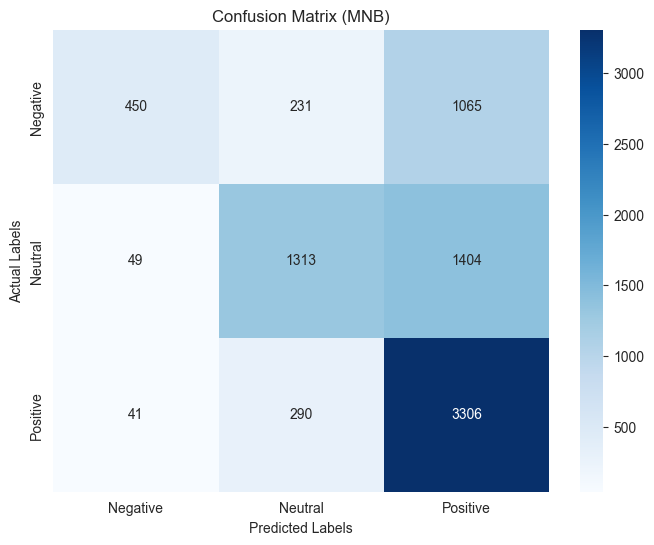

In [52]:
plot_confusion_matrix(conf_matrix_mnb, 
                      "Confusion Matrix (MNB)", 
                      "Blues")

### Task 3

In [15]:
def get_sentiment(int):
    if int > 0.005:
        return 'Positive'
    elif int < -0.005:
        return 'Negative'
    else:
        return 'Neutral'

In [16]:
actual_str_sentiments = []
predicted_str_sentiments = []
for review, actual_sentiment in zip(text_test, sentiment_test):
    analysis = TextBlob(review)
    predicted_sentiment = get_sentiment(analysis.sentiment.polarity)
    # print('REVIEW:', review)
    # print('Actual Sentiment:', actual_sentiment)
    # print('Predicted Sentiment:', predicted_sentiment)
    actual_str_sentiments.append(get_sentiment(actual_sentiment))
    predicted_str_sentiments.append(predicted_sentiment)

In [17]:
# Розрахунок точності моделі TextBlob
accuracy_tb = accuracy_score(actual_str_sentiments, predicted_str_sentiments)
print(f"TextBlob accuracy: {accuracy_tb:.4f}")
conf_matrix_tb = confusion_matrix(actual_str_sentiments, predicted_str_sentiments)

TextBlob accuracy: 0.8244


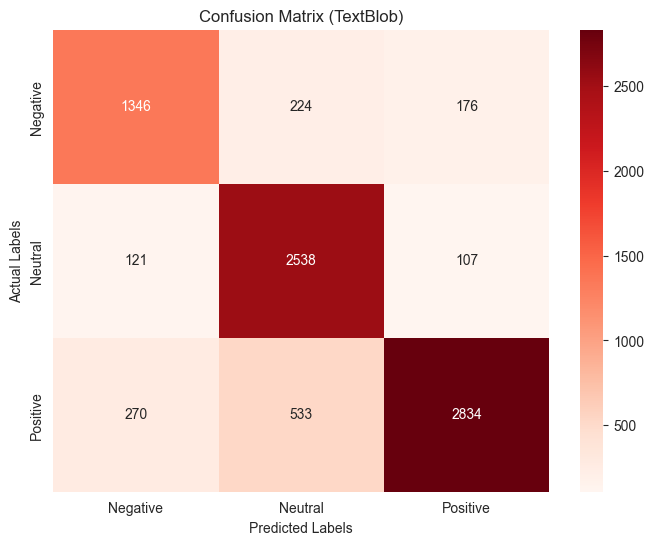

In [18]:
plot_confusion_matrix(conf_matrix_tb, 
                      "Confusion Matrix (TextBlob)", 
                      "Reds")

In [19]:
num_random_samples = 3
random_indices = random.sample(range(len(text_test)), num_random_samples)

for i in random_indices:
    review = text_test.iloc[i]
    actual_sentiment = sentiment_test.iloc[i]
    predicted_polarity = TextBlob(review).sentiment.polarity
    predicted_sentiment_tb_single = get_sentiment(predicted_polarity)
    print('Review:', review)
    print('Actual sentiment:', actual_sentiment)
    print('Predicted polarity TextBlob:', predicted_polarity)
    print('Predicted sentiment TextBlob:', predicted_sentiment_tb_single)
    print('Predicted sentiment (MNB):', sentiment_pred_mnb[i])
    print('-' * 40)

Review: modi go consider
Actual sentiment: 0.0
Predicted polarity TextBlob: 0.0
Predicted sentiment TextBlob: Neutral
Predicted sentiment (MNB): 1.0
----------------------------------------
Review: lose mind stand modi wave time
Actual sentiment: 0.0
Predicted polarity TextBlob: 0.0
Predicted sentiment TextBlob: Neutral
Predicted sentiment (MNB): 1.0
----------------------------------------
Review: modi saree big hit election season
Actual sentiment: 0.0
Predicted polarity TextBlob: 0.0
Predicted sentiment TextBlob: Neutral
Predicted sentiment (MNB): 1.0
----------------------------------------
